# Assignment 10

### 1.复习上课内容

### 2. 回答一下理论题目

#### 1. What is independent assumption in Naive bayes ?

朴素贝叶斯中，独立假设是指用于分类的特征在类别确定的前提下都是条件独立的。也就是说：$$P(a_1, a_2, \cdots, a_n|v_j) = P(a_1|v_j)P(a_2|v_j)\cdots P(a_n|v_j)$$

#### 2. What is MAP(maximum a posterior) and ML(maximum likelihood) ?

在给定数据D和假设空间H前提下，通过MAP或ML来对输入进行预测。
- MAP, 即最大化后验概率。$$h_{MAP} = {\arg\max}_h P(h|D) = {\arg\max}_h {\frac{P(D|h)P(h)}{P(D)}}={\arg\max}_h{P(D|h)P(h)}$$
- ML，即最大化似然估计概率。如果对于假设空间H中的所有假设h，概率相同，我们就得到了ML模型。$$h_{ML} = {\arg\max}_h{P(D|h)}$$

#### 3. What is support vector in SVM?

在SVM中，支持向量（support vector）是指位于分类边界上的数据，只有这些数据对SVM模型起作用。

#### 4. What is the intuition behind SVM ?

SVM利用直线（或高维空间中的超平面）对数据进行分类，使得离直线（或超平面）最近的点间隔最大化。

#### 5. Shortly describ what 'random' means in random forest ?

随机森林中（Random Forest）中的随机，是指每次利用Decision Tree对数据进行训练时，会从所有数据中**随机**放回地取样，并从所有特征中**随机**选取若干个特征，利用这些数据对特征进行划分。

#### 6. What cariterion does XGBoost use to find the best split point in a tree ?

XGBoost定义以下目标函数，使得分割时，对每一个叶子节点，目标函数最小化。

目标函数定义为：$Obj = L(y_i, \hat{y_i}) + \Sigma_{t=1}^T \Omega({f_i})$

其中，$L(y_i, \hat{y_i})$为损失函数，衡量模型对数据的拟合程度；$\Omega({f_i})=\gamma T + \frac{1}{2}\lambda\Sigma_{j=1}^T \omega_j^2$为叶子节点得分的$L_2$正则化，防止过拟合。

### 3. Practial part

##### Problem description: In this part you are going to build a classifier to detect if a piece of news is published by the Xinhua news agency (新华社）.

#### Hints:

###### 1. Firstly, you have to come up with a way to represent the news. (Vectorize the sentence, you can find different ways to do so online)  

###### 2. Secondly,  pick a machine learning algorithm that you think is suitable for this task

In [2]:
import pandas as pd
data = pd.read_csv('./data.csv', encoding='gb18030')
data.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [3]:
target =[]
for t in data['source']:
    if '新华社' in str(t):
        target.append(1)
    else:
        target.append(0)

In [4]:
import jieba
import gensim
from gensim.models import doc2vec

In [5]:
text = list(data['content'])

In [6]:
import re
def token(string):
    return re.findall('\w+', string)

In [7]:
text_clean = [''.join(token(str(a))) for a in text]

In [8]:
def cut_text(text):
    stopwords = []
    with open('./stopwords.txt') as f:
        stopwords.append(f.readline())
    result = []
    for sentence in text:
        words = list(jieba.cut(sentence))
        s = [word for word in words if word not in stopwords]
        result.append(' '.join(s))
    return result

In [9]:
text_train = cut_text(text_clean)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.911 seconds.
Prefix dict has been built successfully.


In [10]:
text_train[0]

'此外 自 本周 6 月 12 日起 除 小米 手机 6 等 15 款 机型 外 其余 机型 已 暂停 更新 发布 含 开发 版 体验版 内测 稳定版 暂不受 影响 以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作 有人 猜测 这 也 是 将 精力 主要 用到 MIUI9 的 研发 之中 MIUI8 去年 5 月 发布 距今已有 一年 有余 也 是 时候 更新换代 了 当然 关于 MIUI9 的 确切 信息 我们 还是 等待 官方消息'

In [11]:
from gensim.models.doc2vec import TaggedDocument
data_train = []
for i, text in enumerate(text_train):
    word_list = text.split(' ')
    document = TaggedDocument(word_list, [i])
    data_train.append(document)

In [12]:
def train_vec(data_train, size=300):
    model = doc2vec.Doc2Vec(data_train, min_count=1, window=3, vector_size=size, sample=1e-3, negative=5, workers=4)
    model.train(data_train, total_examples=model.corpus_count, epochs=10)
    return model

In [13]:
model = train_vec(data_train)

In [14]:
data_vectors = [model.infer_vector(words.split(' ')) for words in text_train]

In [15]:
len(target) == len(data_vectors)

True

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [17]:
X_train, X_test, y_train, y_test = train_test_split(data_vectors, target, test_size=0.2, random_state=0)
forest = RandomForestClassifier(n_estimators=100, max_depth=10)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
forest.score(X_train, y_train)

0.9554876687869658

In [19]:
forest.score(X_test, y_test)

0.9273001171678849

In [20]:
y_pred = forest.predict(X_test)
y_pred_prob = forest.predict_proba(X_test)

In [21]:
total = len(y_test)
right = sum(y_test == y_pred)
print("Accuracy:{:.2f}%".format(right/total*100))

Accuracy:92.73%


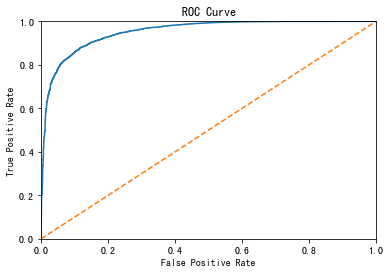

In [39]:
import matplotlib.pyplot as plt
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob[:,1])
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0,1],[0,1], ls='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [23]:
print('AUC Score:{:.4f}'.format(roc_auc_score(y_test, y_pred_prob[:,1])))

AUC Score:0.9527


### Congratulations! You have completed all assignments in this week. The question below is optional. If you still have time, why don't try it out.

## Option:

#### Try differnt machine learning algorithms with different combinations of parameters in the practical part, and compare their performances (Better use some visualization techiniques).

### 分别使用Random Forest，SVM，XGBoost进行调参，比较模型的表现

- Random Forest 模型调参

In [41]:
from sklearn.grid_search import GridSearchCV
rf_params1 = {'n_estimators':[10,50,100],'max_depth':[10,20,30]}
grid = GridSearchCV(RandomForestClassifier(), param_grid=rf_params1, scoring='roc_auc', cv=5)

In [42]:
grid.fit(X_train[:int(len(y_train))], y_train[:int(len(y_train))])

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100], 'max_depth': [10, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [44]:
print('Best Params:',grid.best_params_)
print('AUC Score of train data:{:.4f}'.format(grid.score(X_train, y_train)))
print('AUC Score of test data:{:.4f}'.format(grid.score(X_test, y_test)))

Best Params: {'n_estimators': 100, 'max_depth': 30}
AUC Score of train data:0.9999
AUC Score of test data:0.9572


In [100]:
y_pred_prob = grid.predict_proba(X_test)

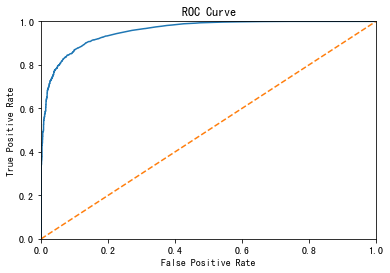

In [101]:
import matplotlib.pyplot as plt
fpr_rf, tpr_rf, threshold = roc_curve(y_test, y_pred_prob[:,1])
fig, ax = plt.subplots()
ax.plot(fpr_rf, tpr_rf)
ax.plot([0,1],[0,1], ls='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [55]:
print("AUC Score of test data:{:.4f}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

AUC Score of test data:0.9572


对n_estimators以及max_depth进行调参后，AUC Score略有提升（0.9527-->0.9725）。其他参数组合也可以适当调参，模型表现可能会更好。

- SVM 模型调参

In [61]:
from sklearn.svm import SVC
# svm_params = [{'kernel':['rbf'], 'gamma':[1e-2],'C':[1,10]}]
svm_params = [{'kernel':['rbf'], 'gamma':[1e-2,1e-3],'C':[1,10,100,1000]}]
svm_grid = GridSearchCV(SVC(), param_grid=svm_params, scoring='roc_auc', cv=5)
svm_grid.fit(X_train[:1000], y_train)
print('Best Params:', svm_grid.best_params_)
print('AUC Score of train data:{:.4f}'.format(svm_grid.score(X_train, y_train)))
print('AUC Score of test data:{:.4f}'.format(svm_grid.score(X_test, y_test)))

Best Params: {'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
AUC Score of train data:0.9311
AUC Score of test data:0.9317


In [81]:
y_pred_prob_svm = svm_grid.decision_function(X_test)

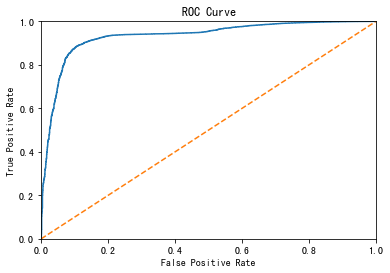

In [98]:
import matplotlib.pyplot as plt
fpr_svm, tpr_svm, threshold = roc_curve(y_test, y_pred_prob_svm)
fig, ax = plt.subplots()
ax.plot(fpr_svm, tpr_svm)
ax.plot([0,1],[0,1], ls='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

使用SVM模型对数据进行预测，AUC Score相比Random Forest要低。

- XGBoost 模型

In [90]:
from xgboost.sklearn import XGBClassifier
clf = XGBClassifier(scoring='roc_auc', n_jobs=-1)

In [91]:
import numpy as np
clf.fit(np.array(X_train), y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, scoring='roc_auc', subsample=1,
       tree_method=None, validate_parameters=False, verbosity=None)

In [93]:
y_pred_prob_xgb = clf.predict_proba(np.array(X_test))

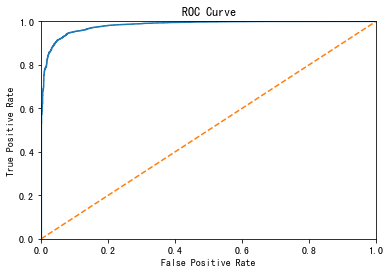

In [102]:
fpr_xgb, tpr_xgb, threshold = roc_curve(y_test, y_pred_prob_xgb[:,1])
fig, ax = plt.subplots()
ax.plot(fpr_xgb, tpr_xgb)
ax.plot([0,1],[0,1], ls='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [97]:
print('AUC Score of test data:{:4f}'.format(roc_auc_score(y_test, y_pred_prob_xgb[:,1])))

AUC Score of test data:0.981781


可以看出，未经调参的XGBoost模型AUC Score已经达到0.98

### 模型比较

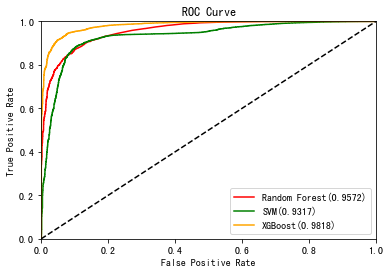

In [114]:
from sklearn.metrics import auc
fig, ax = plt.subplots()
ax.plot(fpr_rf, tpr_rf, color='red', label='Random Forest({:.4f})'.format(auc(fpr_rf, tpr_rf)))
ax.plot(fpr_svm, tpr_svm, color='green', label='SVM({:.4f})'.format(auc(fpr_svm, tpr_svm)))
ax.plot(fpr_xgb, tpr_xgb, color='orange', label='XGBoost({:.4f})'.format(auc(fpr_xgb, tpr_xgb)))
ax.plot([0,1],[0,1], ls='--', color='black')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

从ROC曲线中可以看出，XGBoost模型曲线下覆盖的面积最大，模型效果最好；Random Forest模型效果次之；SVM模型的效果最差。之后可通过对模型参数的进一步微调，提高模型的预测性能。